<a href="https://colab.research.google.com/github/anacrm00/Test/blob/main/Solar_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Solar power prediction with KNN**

---



**Importing necessary libraries**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

**Data exploration**

First, the data set is imported and stored:

In [32]:
url = ("https://raw.githubusercontent.com/anacrm00/Solar/main/Pasion_et_al_dataset2.csv")
solar = pd.read_csv(url, header=None)

We add the name of the columns for easier manipulation:

In [33]:
solar.columns = ["Location", "Date", "Time", "Latitude", "Longitude","Altitude","YRMODAHRMI", "Month", "Hour", "Season", "Humidity", 
                 "AmbientTemp","PolyPwr", "Wind.Speed", "Visibility","Pressure", "Cloud.Ceiling"]

We can generate the histogram for our target variable PolyPwr, to get an overview of the range of power we can expect

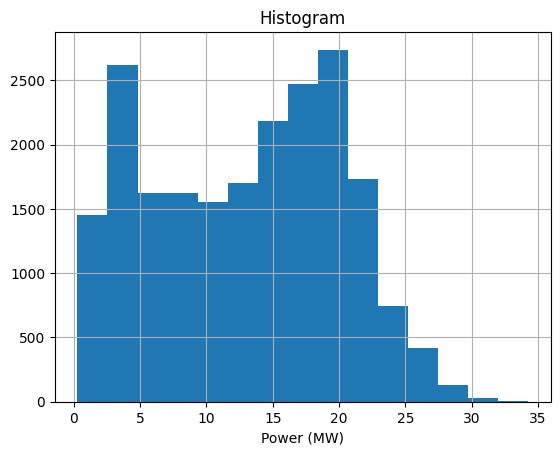

In [34]:
solar["PolyPwr"].hist(bins=15)
plt.xlabel("Power (MW)")
plt.title("Histogram")
plt.show()

We observe that the data does not seem skewed, but there isn't much power output over 30MW. 


We want to study the revelant information and discard any information that will not help us in the prediction. 
This is done thanks to the study of the correlation of the variables, through the correlation matrix. 

<ipython-input-35-7696c1216200>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  solar_corr = solar.corr()
<ipython-input-35-7696c1216200>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(solar.corr(), mask=mask, cmap="YlGnBu", annot=True, fmt=".1f")


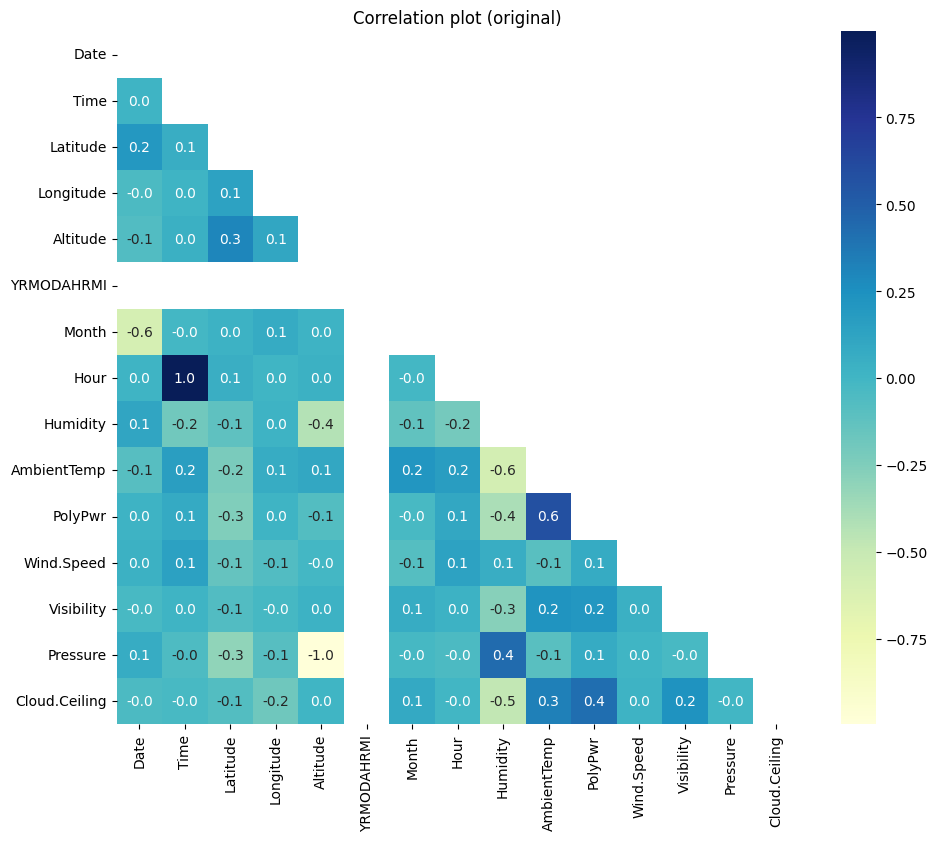

In [35]:
solar_corr = solar.corr()

f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(solar_corr, dtype=bool))

sb.heatmap(solar.corr(), mask=mask, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Correlation plot (original)")
plt.show()

We observe from the correlation plot that the variable "YRMODAHRMI" has no correlation to any other variable and was not explained in the dataset so it is dropped. 

The variables that hold the strongest correlation to our target "PolyPwr" are ambient temperature, humidity and cloud ceiling so these must be kept.

Latitude also holds significant correlation but longitude does not, so it is dropped. 
Date, time, hour and month are also dropped because the have very weak, almost no correlation to the target variable.

<ipython-input-36-93203f642044>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  solar_corr = solar.corr()
<ipython-input-36-93203f642044>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(solar.corr(), mask=mask, cmap="YlGnBu", annot=True, fmt=".1f")


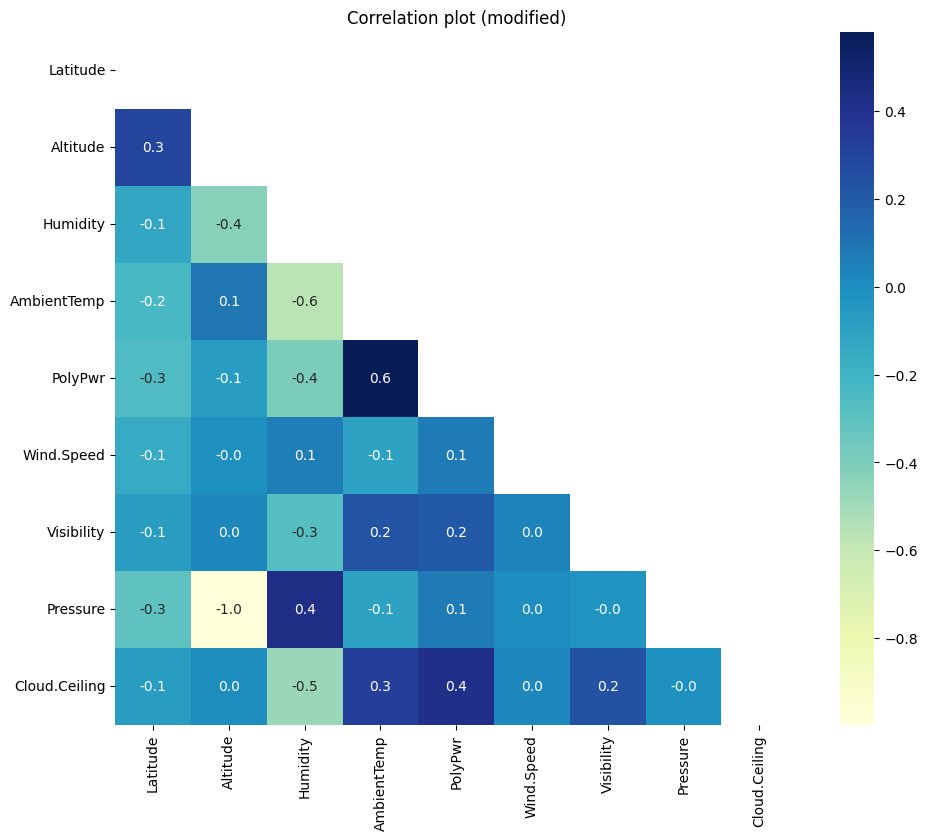

In [36]:
solar.pop("YRMODAHRMI")
solar.pop("Longitude")
solar.pop("Date")
solar.pop("Time")
solar.pop("Hour")
solar.pop("Month")

solar_corr = solar.corr()
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(solar_corr, dtype=bool))
sb.heatmap(solar.corr(), mask=mask, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Correlation plot (modified)")
plt.show()

We need to encode the location and season data, since the data is complied at different locations over all seasons.
This will allow us to make location and season specific predictions.

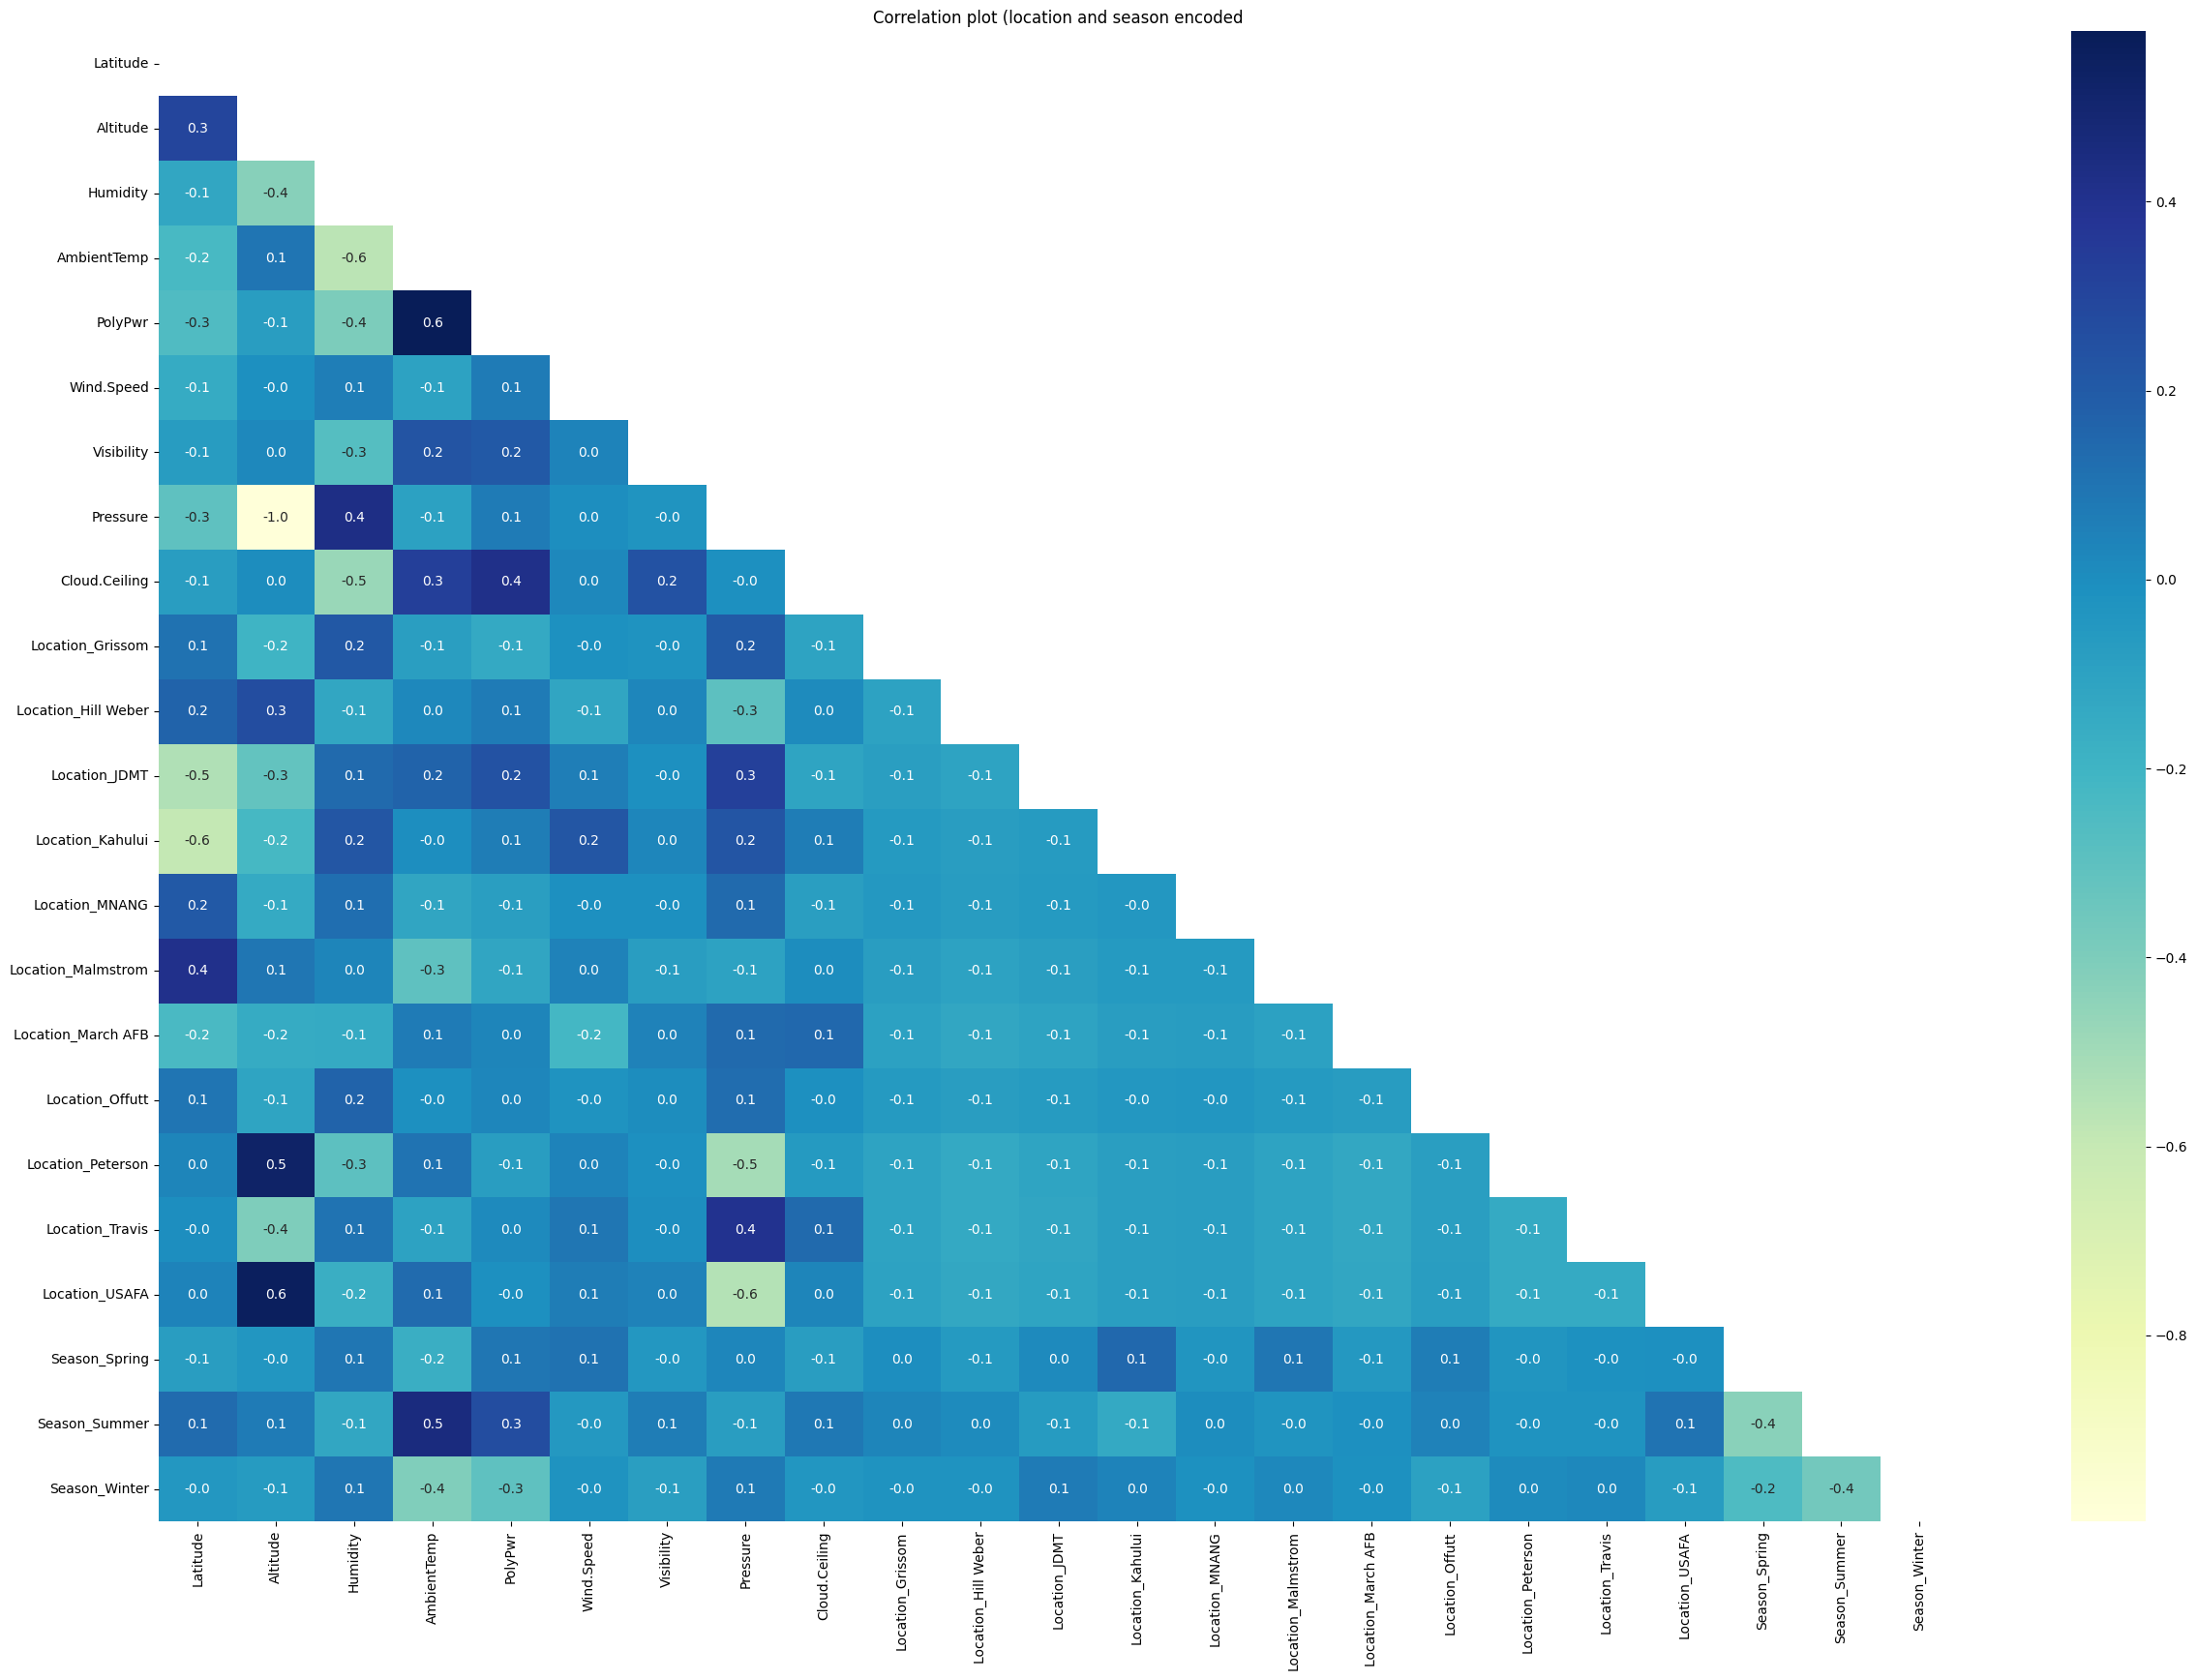

In [37]:
solar_with_location_en = pd.get_dummies(solar, columns=['Location'], drop_first=True)
solar_with_loc_season_en = pd.get_dummies(solar_with_location_en, columns=['Season'], drop_first=True)

mask2 = np.triu(np.ones_like(solar_with_loc_season_en.corr(), dtype=bool))

f, ax = plt.subplots(figsize=(30, 20))
sb.heatmap(solar_with_loc_season_en.corr(), mask=mask2, cmap="YlGnBu", annot=True, fmt='.1f');
plt.title("Correlation plot (location and season encoded")
plt.show()

